In [1]:
import numpy as np
import sklearn
import sklearn.preprocessing
from tensorflow.keras import models, layers
import tensorflow as tf
import pickle
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
scaler = sklearn.preprocessing.StandardScaler()
raw_data = np.load("combined_raw_new.npy")
data = scaler.fit_transform(raw_data)

print(raw_data[0])
print(data[0])

[ 2.21506625e-01  1.98716730e-01  2.47438639e-01  3.12251061e-01
  3.53597760e-01  2.69616127e-01  2.43770167e-01  2.61367977e-01
  3.08557421e-01  3.51591438e-01  2.95899391e-01  2.85270154e-01
 -3.08030822e+01  9.16291880e+01 -1.34131905e+01  3.27046523e+01
  6.41426563e+00  1.06322162e+01  7.12489680e-01  8.87702129e+00
  3.34735474e+00  2.40677079e+00  2.67816823e+00  5.53236438e+00
  1.69774347e+00  2.17399091e+00  2.81441917e+00  1.47291517e+00
 -9.25754016e-02  2.95546336e-02 -8.21006294e-01 -2.08740083e+00
 -5.04136099e-01  1.15752065e+00 -2.36170976e+00 -1.55332044e+00
 -2.42001200e+00 -2.05634959e-01 -6.24383039e-01  6.25805874e-01
  8.27440993e-02 -3.80196970e-01 -2.30371649e+00 -1.07771415e+00
 -2.18627207e+00 -2.78496195e+00 -2.18552850e+00 -1.20462574e+00
 -2.14568937e+00 -1.13784866e+00 -1.33635444e+00  2.61237127e+00
  1.88294944e+01  1.19211680e+01  1.49528394e+01  1.35217277e+01
  1.53984617e+01  1.62141190e+01  1.58460330e+01]
[-0.3173263  -0.33040601 -0.11036716  0.

In [3]:
with open("labelEncoder.pkl", "rb") as f:
  le = pickle.load(f)
labels = np.load("labels.npy").astype(int)
print(le.inverse_transform(labels))

['pop' 'pop' 'pop' ... 'jazz' 'jazz' 'jazz']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
train_data = data[:labels.size] # We originally combined the train and test set
                                # into one matrix, but I truncate to just get
                                # the training data
x, y = sklearn.utils.shuffle(train_data, labels)

In [5]:
model = models.Sequential([
    layers.InputLayer(input_shape=x[0].shape),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30720     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [6]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics="accuracy")

history = model.fit(x, y,
          validation_split=0.2, epochs=100, batch_size=128)

Epoch 1/100
50/50 [==============================] - 4s 27ms/step - loss: 1.7573 - accuracy: 0.3606 - val_loss: 1.2247 - val_accuracy: 0.5800
Epoch 2/100
50/50 [==============================] - 1s 24ms/step - loss: 1.1693 - accuracy: 0.5952 - val_loss: 0.9008 - val_accuracy: 0.7144
Epoch 3/100
50/50 [==============================] - 1s 22ms/step - loss: 0.9175 - accuracy: 0.6883 - val_loss: 0.7549 - val_accuracy: 0.7494
Epoch 4/100
50/50 [==============================] - 1s 26ms/step - loss: 0.7424 - accuracy: 0.7531 - val_loss: 0.6441 - val_accuracy: 0.7837
Epoch 5/100
50/50 [==============================] - 1s 19ms/step - loss: 0.6112 - accuracy: 0.8017 - val_loss: 0.5157 - val_accuracy: 0.8244
Epoch 6/100
50/50 [==============================] - 1s 18ms/step - loss: 0.5072 - accuracy: 0.8334 - val_loss: 0.4561 - val_accuracy: 0.8431
Epoch 7/100
50/50 [==============================] - 1s 19ms/step - loss: 0.4380 - accuracy: 0.8498 - val_loss: 0.4227 - val_accuracy: 0.8612
Epoch 

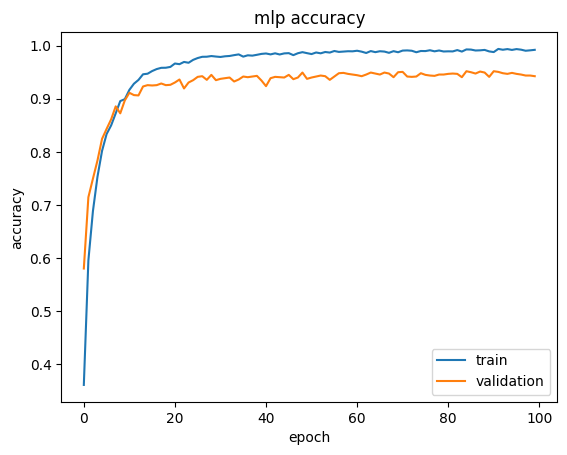

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('mlp accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [8]:
raw_test = np.load("fulltestdata.npy")
test_data = scaler.transform(raw_test)

print(test_data[0])
print(test_data.shape)

[-0.0733342   1.06487222 -0.40498921 -0.06784588  0.4401907   0.11388062
  1.15019337 -0.17596084  0.32136015 -0.28912269 -0.11087781  0.03815871
  1.03619003 -0.19585406 -0.59771561  0.34718554 -1.06431125  1.12328236
 -0.00588216  1.5976316  -0.68624171  0.62373143 -0.34694151  1.41483506
 -0.46702488  1.52452967 -0.33167682  1.37811338 -0.42660159  0.536721
 -0.15446475  0.87441373  0.06551     0.48767465 -0.03076209  0.22193246
 -0.07497758 -0.02811894  0.28196574 -0.38720028  0.30478171 -0.22885495
  0.11064373 -0.12272891 -0.36743187 -0.05910192  0.51002646 -0.18975662
 -0.12727967  0.28397658  0.36641305 -0.31939634  1.22191354 -0.66010737
 -1.03767971 -1.06531925 -1.22652229 -0.81411931  1.31817267]
(200, 59)


In [9]:
predictions = model.predict(test_data)
final_preds = le.inverse_transform(np.argmax(predictions, axis=1).astype(int))
print(final_preds)

7/7 [==============================] - 0s 2ms/step
['hiphop' 'pop' 'country' 'blues' 'blues' 'reggae' 'disco' 'classical'
 'country' 'disco' 'disco' 'hiphop' 'hiphop' 'disco' 'reggae' 'country'
 'hiphop' 'blues' 'pop' 'hiphop' 'classical' 'disco' 'classical' 'metal'
 'blues' 'classical' 'country' 'disco' 'country' 'disco' 'classical'
 'classical' 'jazz' 'country' 'hiphop' 'disco' 'reggae' 'country'
 'classical' 'rock' 'pop' 'disco' 'rock' 'pop' 'rock' 'disco' 'country'
 'pop' 'metal' 'disco' 'disco' 'disco' 'reggae' 'classical' 'reggae'
 'reggae' 'pop' 'hiphop' 'hiphop' 'country' 'classical' 'country'
 'country' 'country' 'pop' 'rock' 'pop' 'rock' 'rock' 'hiphop' 'rock'
 'metal' 'classical' 'metal' 'country' 'hiphop' 'disco' 'rock' 'rock'
 'disco' 'pop' 'disco' 'pop' 'country' 'reggae' 'reggae' 'classical'
 'disco' 'rock' 'disco' 'blues' 'classical' 'reggae' 'disco' 'blues'
 'classical' 'pop' 'country' 'country' 'reggae' 'jazz' 'country' 'pop'
 'metal' 'classical' 'pop' 'rock' 'pop' 'r

In [10]:
pd.DataFrame(final_preds).to_csv("NEWPREDS.csv")